# Sentiment analysis
> - naver movier review

In [1]:
import csv
from pprint import pprint

# tsv load
with open('corpus/naver_movie_corpus/ratings_train.txt', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f, delimiter='\t')
    naver_train = list(rdr)
    naver_train = naver_train[1:]
    
with open('corpus/naver_movie_corpus/ratings_test.txt', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f, delimiter='\t')
    naver_test = list(rdr)
    naver_test = naver_test[1:]

pprint(naver_train[35:42])

[['4726746', '패션에 대한 열정! 안나 윈투어!', '1'],
 ['7203432', '키이라 나이틀리가 연기하고자 했던건 대체 정신장애일까 틱장애일까', '0'],
 ['112724', '허허...원작가 정신나간 유령이라... 재미있겠네요!', '1'],
 ['1105872', '포스터는 있어보이는데 관객은 114명이네', '0'],
 ['4805788', '이 영화가 왜 이렇게 저평가 받는지 모르겠다', '1'],
 ['9336496', '단순하면서 은은한 매력의 영화', '1'],
 ['9994900',
  "'다 알바생인가 내용도 없고 무서운거도 없고 웃긴거도 하나도 없음 완전 별싱거운 영화.ㅇ.ㅇ내ㅇ시간 넘 아까움 .. . 완전 낚임",
  '0']]


In [2]:
# pos tagging, tokenizing
from tqdm import tqdm_notebook
from konlpy.tag import Twitter
tagger = Twitter()

# *****pos tagging에 시간 좀 걸립니다******
def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

sentences = []
naver_tot = naver_train+naver_test
naver_tot = naver_tot[:5000] # 노트북에서 돌릴때 데이터 줄이기
for sentence in tqdm_notebook(naver_tot):
    sentences.append(tokenize(sentence[1]))

A Jupyter Widget

In [3]:
print('문장 총 개수: ', len(sentences))
for i in range(5):
    print(sentences[i])

문장 총 개수:  5000
['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증/Noun', '나다/Verb', '목소리/Noun']
['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb']
['너무/Noun', '재/Noun', '밓었/Noun', '다/Josa', '그래서/Adverb', '보다/Verb', '추천/Noun', '하다/Verb']
['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun']
['사이몬페그/Noun', '의/Josa', '익살/Noun', '스런/Josa', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '크다/Verb', '스틴/Noun', '던스트/Noun', '가/Josa', '너무나/Noun', '도/Josa', '이쁘다/Adjective', '보이다/Verb']


In [4]:
from gensim import models

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
%%time
size=100
model = models.Word2Vec(size=size, window=7, min_count=5, workers=8,alpha=0.025, min_alpha=0.025)

model.build_vocab(sentences) # 오로지 한번만 스트럭팅 가능

# learning_rate를 낮춰가며 여러번 트레이닝
for epoch in range(15):
    if epoch%1 ==0:
        print('epoch:',epoch, 'train completed')
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

epoch: 0 train completed


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # Remove the CWD from sys.path while we load stuff.


epoch: 1 train completed
epoch: 2 train completed
epoch: 3 train completed
epoch: 4 train completed
epoch: 5 train completed
epoch: 6 train completed
epoch: 7 train completed
epoch: 8 train completed
epoch: 9 train completed
epoch: 10 train completed
epoch: 11 train completed
epoch: 12 train completed
epoch: 13 train completed
epoch: 14 train completed
Wall time: 2.4 s


In [6]:
model.wv.vocab

{'아/Exclamation': <gensim.models.keyedvectors.Vocab at 0x24e48a63e10>,
 '더빙/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a63e80>,
 '../Punctuation': <gensim.models.keyedvectors.Vocab at 0x24e48a63e48>,
 '진짜/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a63cc0>,
 '짜증/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84be0>,
 '나다/Verb': <gensim.models.keyedvectors.Vocab at 0x24e48a84c18>,
 '목소리/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84c50>,
 '흠/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84c88>,
 '.../Punctuation': <gensim.models.keyedvectors.Vocab at 0x24e48a84cc0>,
 '포스터/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84cf8>,
 '보고/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84d30>,
 '초딩/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84d68>,
 '영화/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84da0>,
 '줄/Noun': <gensim.models.keyedvectors.Vocab at 0x24e48a84dd8>,
 '..../Punctuation': <gensim.models.keyedvectors.Vocab at 0x24e48a84e

---
>이후론 노래가사 분류와 거의 동일합니다

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# 20단어 이상만 골라내기
data = [(sentences[idx][:20], el[2]) for idx,el in enumerate(naver_tot) if len(sentences[idx])>=20]
data_x = [i[0] for i in data]
data_y = [int(i[1]) for i in data]

# split test set 20%
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=3)

# split validation set 2%
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.02, random_state=3)

In [14]:
# print('나/Noun => \n ----vector---- \n', model.wv.get_vector('나/Noun'))
print(X_train[100], '=>\n------vector-------\n')
tmp =[model.wv.get_vector(i) for i in X_train[100]]
print(len(tmp), len(tmp[0]))

['몇몇/Noun', '에피소드/Noun', '는/Josa', '1/Number', '번/Noun', '보아/Noun', '도/Josa', '만족/Noun', ',/Punctuation', '몇몇/Noun', '에피소드/Noun', '는/Josa', '2/Number', '~/Punctuation', '3/Number', '번/Noun', '보아/Noun', '야/Josa', '만족/Noun', ',/Punctuation'] =>
------vector-------

20 100


In [15]:
sess = tf.InteractiveSession()
Y_train = sess.run(tf.one_hot(Y_train, 2))
Y_val = sess.run(tf.one_hot(Y_val, 2))
Y_test = sess.run(tf.one_hot(Y_test, 2))
print([len(X_train),len(X_train[0])], [len(Y_train),len(Y_train[0])], [len(X_val),len(X_val[0])], [len(Y_val),len(Y_val[0])], len(Y_test))

[839, 20] [839, 2] [18, 20] [18, 2] 215


In [16]:
tf.reset_default_graph()
# train Parameters
seq_length = 20
data_dim = 100
hidden_dim = 100
output_dim = 2
learning_rate = 0.001
epoch = 5
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length*data_dim])
X_re = tf.reshape(X, [-1, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, output_dim])

# 2-layer LSTM 
cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
                                    for _ in range(2)], state_is_tuple=True) # multiple layers
outputs, _states = tf.nn.dynamic_rnn(cell, X_re, dtype=tf.float32) # batch major (batch, seq, input)
# (batch, seq, data) -> (seq, batch, data)
# outputs[:, -1] 이렇게 하면 앞의 transpose안해줘도 됨
fc1 = tf.contrib.layers.fully_connected(outputs[:, -1], 100, activation_fn=tf.nn.relu)  # We use the last cell's output

Y_pred = tf.contrib.layers.fully_connected(fc1, output_dim, activation_fn=None)  # We use the last cell's output
hypothesis = tf.nn.softmax(Y_pred)

# cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(cost)

# prediction
predicted = tf.argmax(hypothesis, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

total_iter = epoch*int(len(X_train)/batch_size) # 총 학습횟수
print('total iteration:', total_iter, '...')

total iteration: 40 ...


In [17]:
# 각 단어들에 word embedding
def tok_embedding(tok_vec):
    w2v_vec = []
    mean = np.mean(model.wv.syn0, axis=0) # github code에 없음... 넣어줘야함
    for i in tok_vec: # 그냥 vec넣으면 134170 다들어감 메모리 절대 부족!!! 파이프라인 구축 필요
        temp =[]
        for j in i:
            try:
                temp += list(model.wv.get_vector(j))
            except:
                temp += list(mean)
        w2v_vec.append(temp)
#     reshape은 텐서플로에서 함
#     w2v_vec = np.array(w2v_vec, dtype='float16')
#     return w2v_vec.reshape([-1,200,embed_dim])
    return w2v_vec

# 피처 데이터, 레이블, 미니배치 갯수, random sampling
import random
def getMiniBatch2(x, y, n):
    if len(x) != len(y):
        print('Feature and label num is not equal.')
        return
    rand_idx = random.sample(list(range(len(x))), n)
    x_ = [x[i] for i in rand_idx]
    y_ = [y[i] for i in rand_idx]
    return tok_embedding(x_), y_

In [18]:
%%time
#----------------------
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]
X_val_tok = tok_embedding(X_val)

for i in range(total_iter*100):
    X_, Y_ = getMiniBatch2(X_train, Y_train, batch_size) # 랜덤 미니배치 할당
    train_step.run(feed_dict={X:X_, Y:Y_})

#   아래에 결과 프린트용
    if i % 10 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:X_, Y:Y_})
        val_accuracy, val_cost = sess.run([accuracy, cost], feed_dict={X:X_val_tok, Y:Y_val})
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(val_cost)
        x_range.append(i)
        print('step %d: acc_tr %g, acc_tt %g, val_cost %g' % (i, train_accuracy, val_accuracy, val_cost))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


step 0: acc_tr 0.57, acc_tt 0.388889, val_cost 0.700956
step 10: acc_tr 0.66, acc_tt 0.777778, val_cost 0.528238
step 20: acc_tr 0.75, acc_tt 0.722222, val_cost 0.590423
step 30: acc_tr 0.83, acc_tt 0.666667, val_cost 0.565084
step 40: acc_tr 0.82, acc_tt 0.722222, val_cost 0.641014
step 50: acc_tr 0.85, acc_tt 0.666667, val_cost 0.562359
step 60: acc_tr 0.81, acc_tt 0.777778, val_cost 0.656548
step 70: acc_tr 0.87, acc_tt 0.722222, val_cost 0.676414
step 80: acc_tr 0.89, acc_tt 0.777778, val_cost 0.654036
step 90: acc_tr 0.94, acc_tt 0.722222, val_cost 0.866169
step 100: acc_tr 0.93, acc_tt 0.777778, val_cost 0.702089
step 110: acc_tr 0.95, acc_tt 0.666667, val_cost 1.02102
step 120: acc_tr 1, acc_tt 0.666667, val_cost 1.35482
step 130: acc_tr 1, acc_tt 0.777778, val_cost 1.036
step 140: acc_tr 1, acc_tt 0.777778, val_cost 1.25761
step 150: acc_tr 1, acc_tt 0.666667, val_cost 1.51868
step 160: acc_tr 1, acc_tt 0.722222, val_cost 1.59231
step 170: acc_tr 1, acc_tt 0.722222, val_cost 1.

ValueError: setting an array element with a sequence.

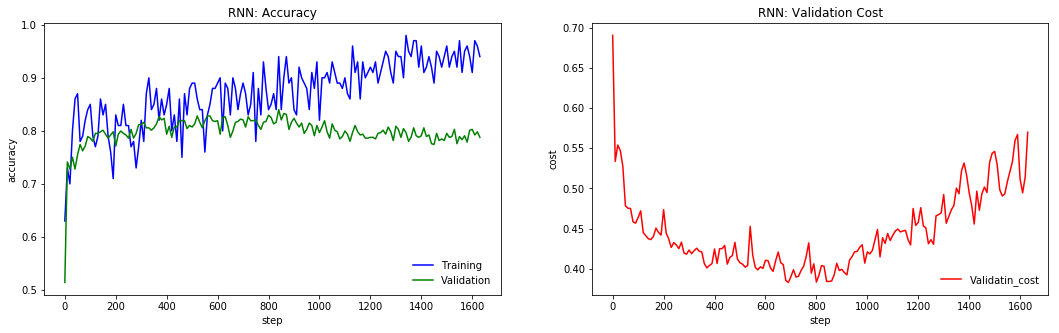

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('RNN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('RNN: Validation Cost')
plt.show()

In [19]:
# 전체 테스트셋 정확도
acc = accuracy.eval(feed_dict={X: tok_embedding(X_test), Y: Y_test})
print('test accuracy:', acc)

print('0: negative, 1: positive')
pred = predicted.eval(feed_dict={X: tok_embedding([X_test[0]])}) 
print(X_test[0])
print('label:', tf.argmax(Y_test[0]).eval(), 'predicted', pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


test accuracy: 0.7209302
0: negative, 1: positive
['오랜만/Noun', '에/Josa', '보다/Verb', '서부/Noun', '극/Suffix', './Punctuation', '소재/Noun', '도/Josa', '독특하다/Adjective', '음악/Noun', '역시/Noun', '특이하다/Adjective', '가스펠/Noun', '을/Josa', '편곡/Noun', '해서/Josa', '쓰다/Verb', ',/Punctuation', '색다르다/Adjective', './Punctuation']
label: 1 predicted [1]
